In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import pandas as pd
from PIL import Image, ImageDraw
import os

In [2]:
image_ids = torch.tensor([int(x.split('.')[0]) for x in os.listdir('../datasets/coco_text_imgs/') if 'jpg' in x])

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/coco_text_imgs/'

In [22]:
image_ids[:10]

tensor([ 9733, 14147,    63,  6400, 13628, 12536,   823, 15259,  4217, 16750])

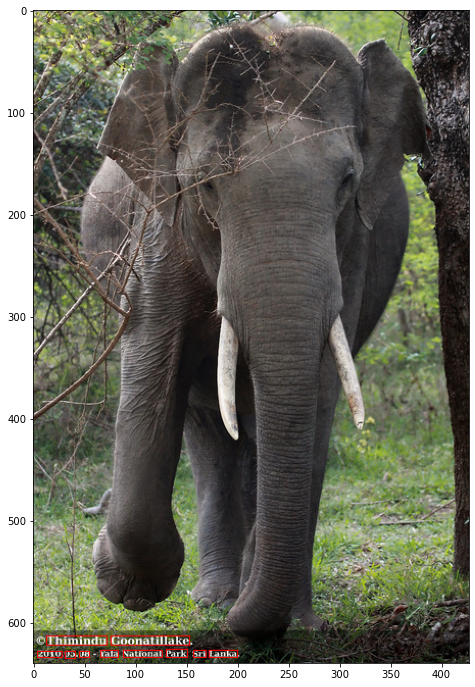

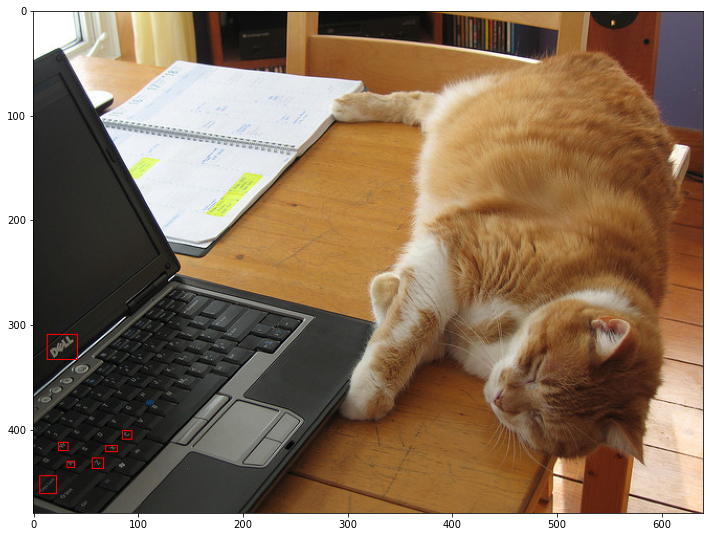

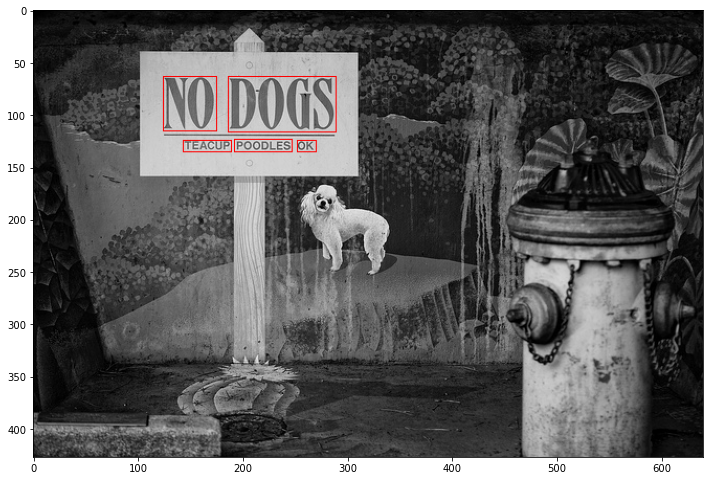

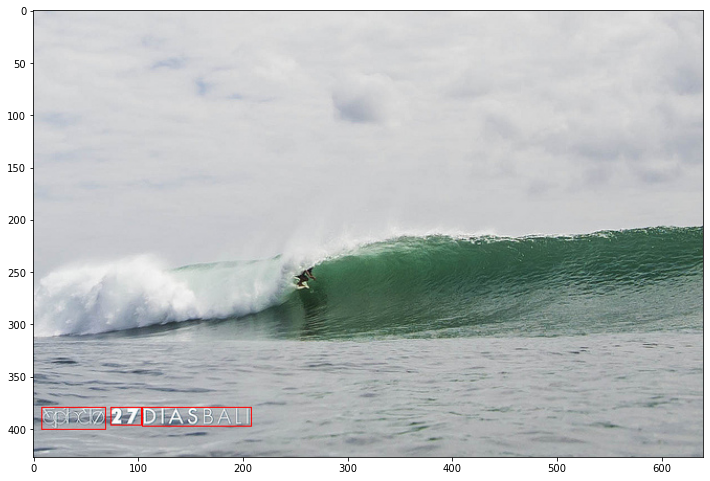

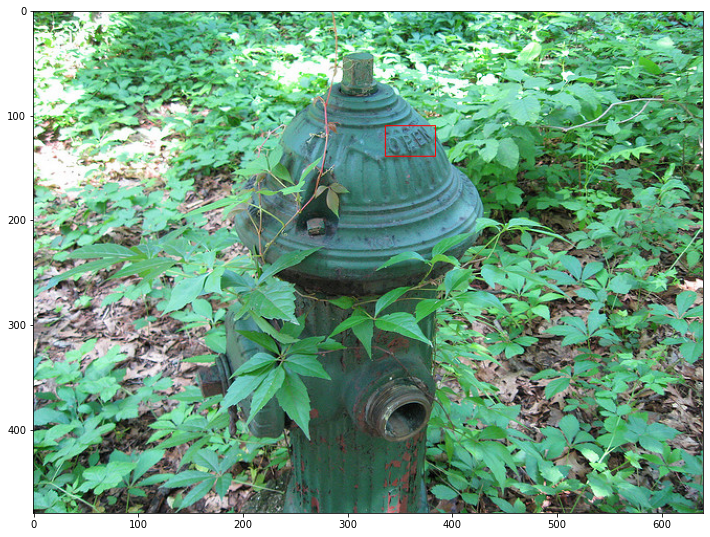

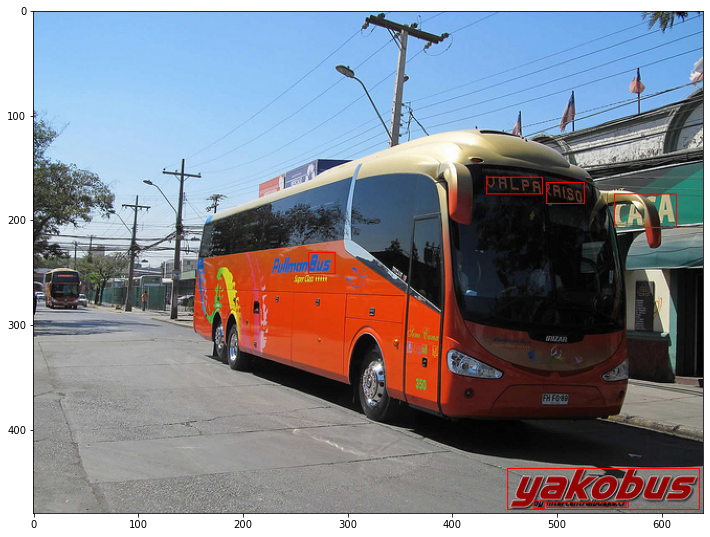

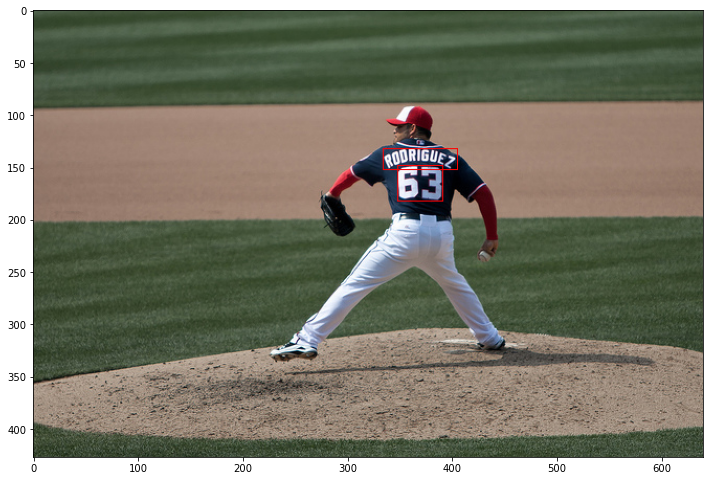

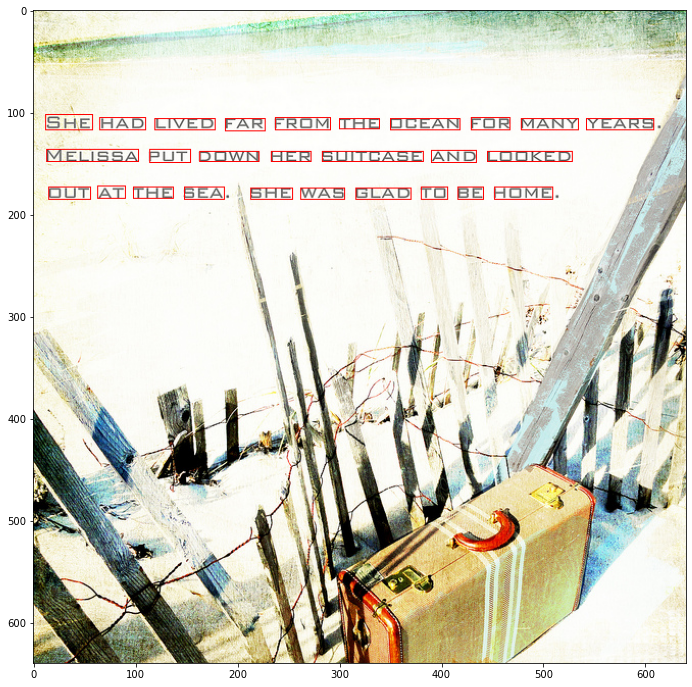

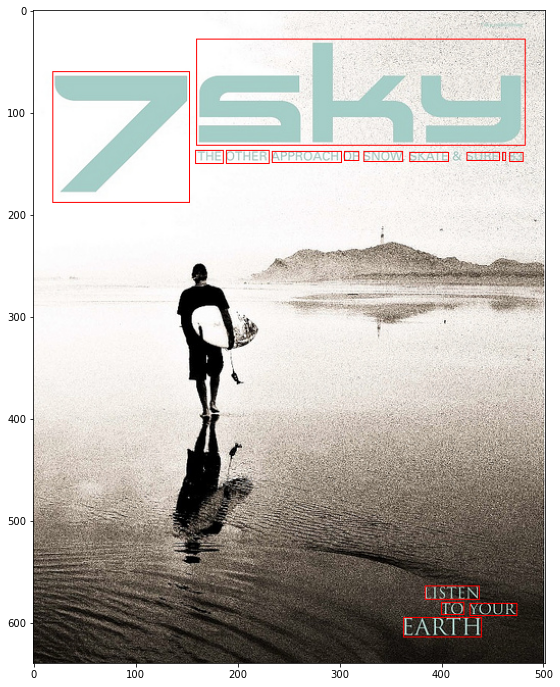

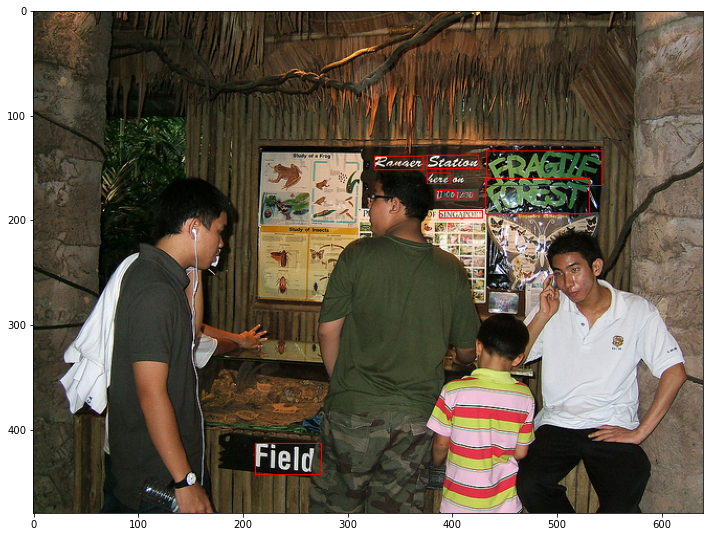

In [23]:
def plot_bounding_box(image_id):
    img = Image.open(f'../datasets/coco_text_imgs/{image_id}.jpg')
    boxes = open(f'../datasets/coco_text_imgs/{image_id}.txt').read()
    w, h = img.size
    img1 = ImageDraw.Draw(img)  
    for i in boxes.split('\n'):
        _, x, y, x_h, y_h = [float(x) for x in i.split(' ')]
        mid = (w*x, h*y)
        size = (w*x_h/2, h*y_h/2)
        shape = [(mid[0]-size[0], mid[1]-size[1]), (mid[0]+size[0], mid[1]+size[1])]
        img1.rectangle(shape, outline ="red")
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.show()
for i in image_ids[torch.randint(high=len(image_ids), size=(10,))]:
    plot_bounding_box(i)

In [35]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(image_ids, test_size=0.2)
len(train), len(val)

(13712, 3429)

In [43]:
import shutil
from pathlib import Path
def move_files_to_folder(image_ids, folder):
    img_files_list = [f'../datasets/coco_text_imgs/{image_id}.jpg' for image_id in image_ids]
    ann_files_list = [f'../datasets/coco_text_imgs/{image_id}.txt' for image_id in image_ids]
    Path('../datasets/yolov8_train_dataset/images/').mkdir(exist_ok=True)
    Path('../datasets/yolov8_train_dataset/labels/').mkdir(exist_ok=True)
    im_path = Path(f'../datasets/yolov8_train_dataset/images/{folder}/')
    an_path = Path(f'../datasets/yolov8_train_dataset/labels/{folder}/')
    if im_path.exists():
        shutil.rmtree(Path(im_path))
    im_path.mkdir()
    if an_path.exists():
        shutil.rmtree(Path(an_path))
    an_path.mkdir()
    for f in img_files_list: shutil.copy(f, im_path)
    for f in ann_files_list: shutil.copy(f, an_path)
move_files_to_folder(train, 'train')
move_files_to_folder(val, 'val')

True
False
